In [14]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats


In [20]:
### find runs that evolved multicellularity or didn't complete
dirname = "/Users/kgskocelas/Research/mt_results/run3"

fname = dirname + "/treat=control3/output.txt"


curFile = open(fname, 'r')
cur_rep = ""
num_rep = 0
mcs = []
dnfs = []

for line in curFile:
    if line.strip(): 
        splitLine = line.strip().split()
        
        if (splitLine[0] == "==>"): 
            rep = splitLine[1]
            cur_rep = rep.split("/")[1]
            cur_rep = cur_rep.replace("a_", "")
            
            num_rep += 1
        else: 

            if (float(splitLine[6]) >= 2): 
                print ("Multicellular: " +  cur_rep)
                int_rep = int(cur_rep)
                mcs.append(int_rep)

            elif (splitLine[0] != "1999900"): 
                print ("Did not finish: " + cur_rep + " " + splitLine[0])
                int_rep = int(cur_rep)
                dnfs.append(int_rep)
            
print("Number of reps: " + str(num_rep))
print("# Multicellular: " + str(len(mcs)))
mcs.sort()
print(mcs)
print("DNFS: " + str(len(dnfs)))
dnfs.sort()
print(dnfs)


Multicellular: 1274
Did not finish: 1289 878100
Did not finish: 1249 1629300
Did not finish: 1260 366500
Multicellular: 1082
Did not finish: 1283 132800
Did not finish: 1299 526000
Did not finish: 1245 1282300
Multicellular: 1052
Did not finish: 1206 1987000
Did not finish: 1232 629500
Did not finish: 1247 1549800
Multicellular: 1112
Did not finish: 1255 384300
Did not finish: 1256 623200
Did not finish: 1257 304100
Multicellular: 1199
Did not finish: 1159 1242900
Multicellular: 1170
Did not finish: 1185 1995900
Did not finish: 1204 679300
Did not finish: 1251 1998900
Did not finish: 1219 1305500
Did not finish: 1292 616500
Did not finish: 1205 868100
Did not finish: 1194 1512500
Did not finish: 1253 1438700
Did not finish: 1268 1979600
Did not finish: 1228 642900
Multicellular: 1108
Did not finish: 1229 594600
Did not finish: 1196 1936800
Did not finish: 1215 1939100
Did not finish: 1263 1826800
Multicellular: 1278
Did not finish: 1158 1587600
Did not finish: 1191 1085100
Did not fini

In [22]:
dirname = "/Users/kgskocelas/Research/mt_results/run3/treat=control3/"
max_soma_means = []
max_overwritten_means = []

# Load file
fname = dirname + "1052/mt_gls.dat"

try: 
    df = pd.read_table(fname, delim_whitespace=True, index_col=False)
    
    # create a new column 'mean_soma_num' based on mean_pop_num and mean_germ_num
    df['mean_soma_num'] = df['mean_pop_num'] - df['mean_germ_num']
    
    # create a new column 'mean_num_overwritten' based on mean_mc_tissue_births & mean_multicell_size
    df['mean_num_overwritten'] = df['mean_mc_tissue_births'] - df['mean_multicell_size'] + 1
    
    # create a new column 'mean_births_per_cell' based on mean_multicell_size & mean_mc_tissue_births
    df['mean_births_per_mc_cell'] = df['mean_mc_tissue_births'] / df['mean_multicell_size'] 
    
except: 
    print ("failed : " + fname)

# Look at dataframe
df = df[['update', 'mean_rep_time', 'mean_res', 'mean_multicell_size',
       'mean_mc_tissue_births', 'mean_num_overwritten', 'mean_births_per_mc_cell', 'mean_germ_num', 'mean_soma_num', 'mean_pop_num',
       'mean_germ_percent', 'mean_germ_workload', 'mean_germ_workload_var',
       'mean_soma_workload', 'mean_soma_workload_var', 'replication_count',
       'mean_uni_rep_time', 'mean_uni_workload', 'mean_mc_rep_time',
       'mean_mc_workload', 'num_uni', 'num_multi', 'num_uni_repro',
       'num_multi_repro', 'mean_uni_index', 'mean_multi_index', 'num_orgs',
       'mean_generation']]
df

,update,mean_rep_time,mean_res,mean_multicell_size,mean_mc_tissue_births,mean_num_overwritten,mean_births_per_mc_cell,mean_germ_num,mean_soma_num,mean_pop_num,...,mean_mc_rep_time,mean_mc_workload,num_uni,num_multi,num_uni_repro,num_multi_repro,mean_uni_index,mean_multi_index,num_orgs,mean_generation
0,0,1.000,5.0000,1.000,0.000,0.000,0.000000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1000,0,0,0,0.0000,0.0000,1000,0.000
1,100,101.000,35.5136,1.000,0.000,0.000,0.000000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1000,0,0,0,0.0000,0.0000,1000,0.000
2,200,201.000,66.3293,1.000,0.000,0.000,0.000000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1000,0,0,0,0.0000,0.0000,1000,0.000
3,300,301.000,96.0378,1.000,0.000,0.000,0.000000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1000,0,0,0,0.0000,0.0000,1000,0.000
4,400,401.000,121.8095,1.000,0.000,0.000,0.000000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1000,0,0,0,0.0000,0.0000,1000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,1750100,188.712,337.2503,8.911,42.919,35.008,4.816407,13.9594,4.8856,18.8450,...,177.6360,471.3678,413,587,10,261,1.1380,1.0051,1000,3060.290
17502,1750200,189.244,346.5877,9.062,43.864,35.802,4.840433,13.9080,5.1533,19.0613,...,175.6113,577.6842,399,601,14,247,1.1429,1.0050,1000,3060.311
17503,1750300,195.903,345.2435,8.942,43.366,35.424,4.849698,13.6716,5.1623,18.8339,...,173.2016,634.1660,412,588,18,253,1.1529,1.0068,1000,3060.398
17504,1750400,201.691,346.3797,9.052,43.296,35.244,4.783031,14.4474,5.1315,19.5789,...,172.7704,595.4086,410,590,9,257,1.1366,1.0051,1000,3060.460


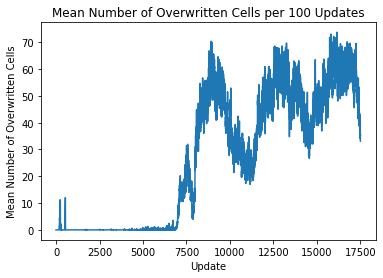

In [23]:
plt.plot(df['mean_num_overwritten'])
plt.xlabel('Update')
plt.ylabel('Mean Number of Overwritten Cells')
plt.title('Mean Number of Overwritten Cells per 100 Updates')
plt.show()

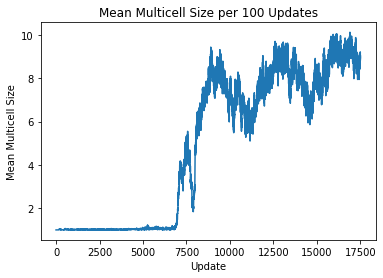

In [24]:
plt.plot(df['mean_multicell_size'])
plt.xlabel('Update')
plt.ylabel('Mean Multicell Size')
plt.title('Mean Multicell Size per 100 Updates')
plt.show()

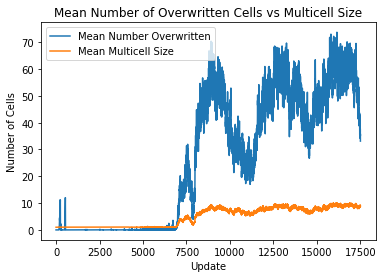

In [25]:
plt.plot(df['mean_num_overwritten'], label='Mean Number Overwritten')
plt.plot(df['mean_multicell_size'], label='Mean Multicell Size')
plt.legend()
plt.xlabel('Update')
plt.ylabel('Number of Cells')
plt.title('Mean Number of Overwritten Cells vs Multicell Size')
plt.show()

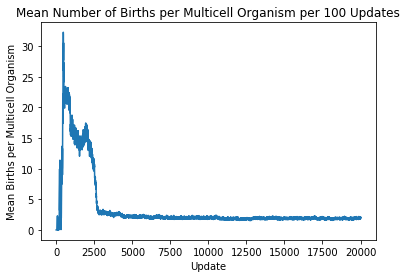

In [27]:
plt.plot(df['mean_births_per_mc_cell'])
plt.xlabel('Update')
plt.ylabel('Mean Births per Multicell Organism')
plt.title('Mean Number of Births per Multicell Organism per 100 Updates')
plt.show()

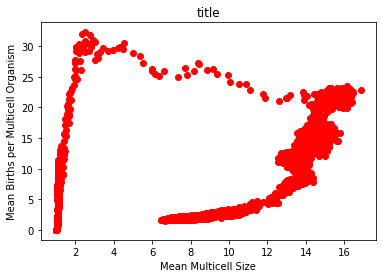

In [28]:
plt.plot(df['mean_multicell_size'], df['mean_births_per_mc_cell'], 'ro')
plt.xlabel('Mean Multicell Size')
plt.ylabel('Mean Births per Multicell Organism')
plt.title('title')
plt.show()